# Combined Shear Estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=16)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import norm

### The Problem

![prob1](./problem.png)

### Method 1

![method1](./method1.png)

In [2]:
gt_1 = np.random.normal(0.1, 0.02, 10000) 
# gt_1 : gt distribution for galaxy 1 (which can be converted from the g1 and g2 distributions of galaxy1)

gt_2 = np.random.normal(0.2, 0.01, 10000)
gt_3 = np.random.normal(0.5, 0.02, 10000)
gt_method1 = 1./3*(gt_1 + gt_2 + gt_3)

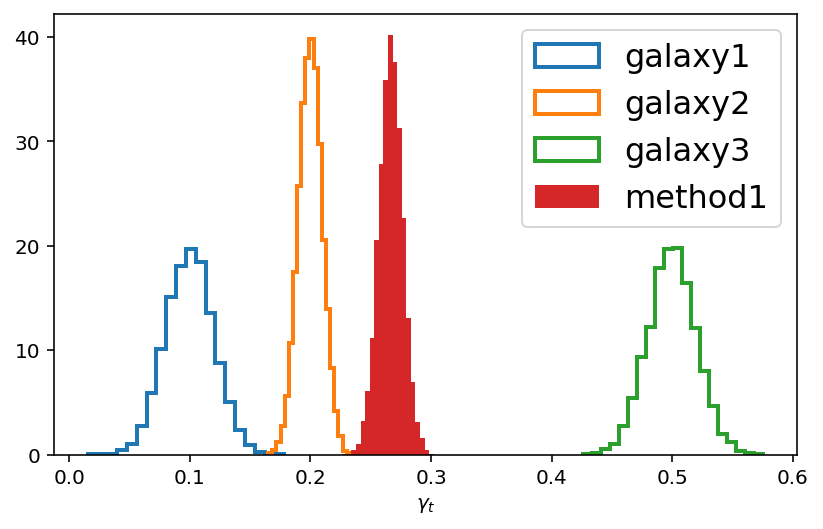

In [3]:
fig, ax = plt.subplots()
plt.rc('font', size=16)

ax.hist(gt_1, bins=20, density=True, histtype='step', label='galaxy1', lw=2)
ax.hist(gt_2, bins=20, density=True, histtype='step', label='galaxy2', lw=2)
ax.hist(gt_3, bins=20, density=True, histtype='step', label='galaxy3', lw=2)
ax.hist(gt_method1, bins=20, density=True, label='method1')


ax.legend()
ax.set_xlabel('$\gamma_t$')

plt.tight_layout()
# ax.set_xlim((0,0.6))

### Method 2

![method2](./method2.png)

In [4]:
p_gt1 = lambda x : norm.pdf(x, 0.1, 0.02)
p_gt2 = lambda x : norm.pdf(x, 0.2, 0.01)
p_gt3 = lambda x : norm.pdf(x, 0.5, 0.02)

p_gt_method2 = lambda x : p_gt1(x)*p_gt2(x)*p_gt3(x)*1e48  
        # 1e48 is just a random renormalization factor for plotting pdf (actual value can be determined)

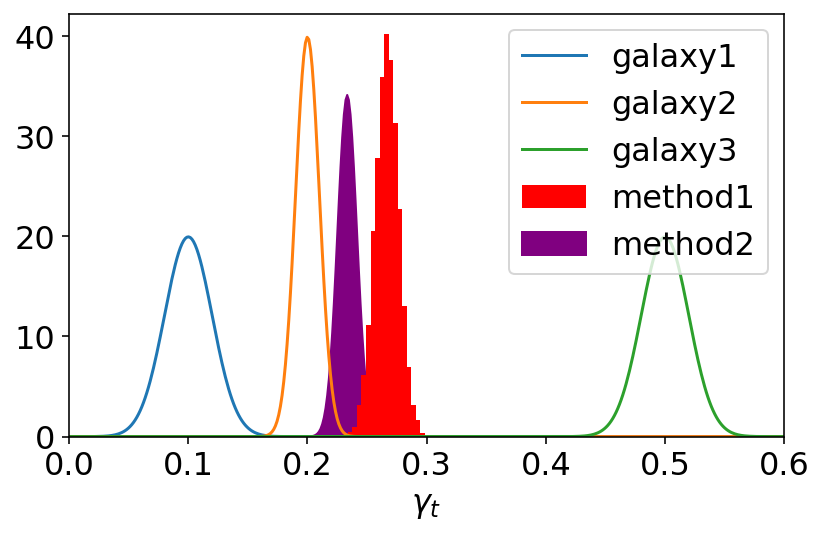

In [5]:
fig, ax = plt.subplots()
plt.rc('font', size=16)

x = np.linspace(-0.7, 0.7, 1000)
ax.plot(x, p_gt1(x), label='galaxy1')
ax.plot(x, p_gt2(x), label='galaxy2')
ax.plot(x, p_gt3(x), label='galaxy3')

ax.hist(gt_method1, bins=20, density=True, label='method1', color='r')
ax.fill_between(x, 0, p_gt_method2(x), label='method2', color='purple')


ax.legend(loc='upper right')
ax.set_xlabel('$\gamma_t$')
ax.set_xlim((0,0.6))

plt.tight_layout()

# ------ End ------ 

In [6]:
# p1=norm.pdf(x,loc=0.1,scale=0.02)
# p2=norm.pdf(x,loc=0.2,scale=0.01)
# p3=norm.pdf(x,loc=0.5,scale=0.02)
# p1k=np.fft.fft(p1)
# p2k=np.fft.fft(p2)
# p3k=np.fft.fft(p3)

# pall=np.fft.ifft(p1k*p2k*p3k)
# plt.plot(x,pall/1e5)
# plt.plot(x,p1)

# #ax.plot(x,pall/1e5,'k--',zorder=100)

